In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from torch import optim

In [2]:
from library.dataset import get_pytorch_datataset, BATCH_SIZE

df_returns_real, dataset, dataloader, N_ASSETS, WINDOW_SIZE = get_pytorch_datataset()

print(f'\nDataset length: {len(dataset)}')
print(f'Number of assets: {N_ASSETS}')
sample_batch = next(iter(dataloader))
assert sample_batch.size() == (BATCH_SIZE, N_ASSETS, WINDOW_SIZE)
print(f'Sample batch: {sample_batch.size()}')

Chosen tickers: ['SBER', 'LKOH', 'SBERP', 'VTBR', 'MOEX']
Length before dropping NaNs: 2989
Length after dropping NaNs: 2959

Dataset length: 2833
Number of assets: 5
Sample batch: torch.Size([256, 5, 126])


In [3]:
df_returns_real=df_returns_real[:-252]

In [9]:
from library.gan import Discriminator, Generator
from library.constants import DEVICE
assert Discriminator()(next(iter(dataloader))).size() == (BATCH_SIZE,)
assert Generator()(Generator.get_noise(BATCH_SIZE)).size() == next(iter(dataloader)).size()


/Users/nikolajgudkov/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [5]:

from library.generation import generate_fake_returns
from library.gan_train_loop import load_gan

generator = Generator().to(DEVICE)
load_gan('TCN', generator, epoch=50)
df_returns_fake = generate_fake_returns(generator, df_returns_real, seed=0)
 

/Users/nikolajgudkov/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Load 50 epoch checkpoint


<Axes: xlabel='date'>

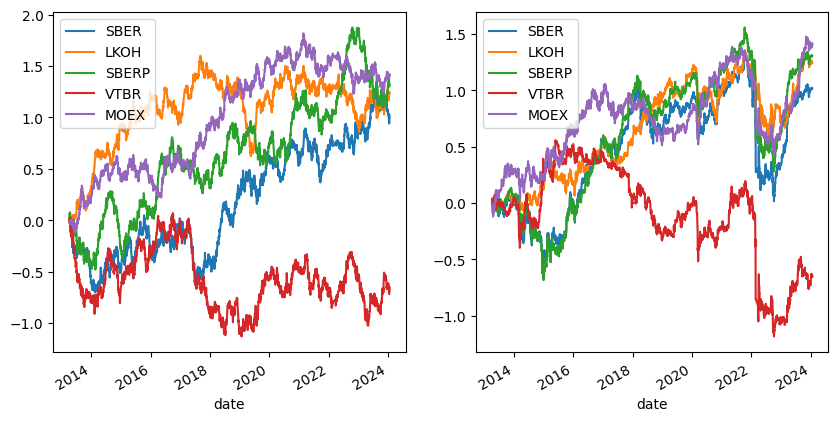

In [16]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

df_returns_fake.cumsum().plot(ax=axes[0])

df_returns_real.cumsum().plot(ax=axes[1])

In [18]:
df_returns_real.columns[0]

'SBER'

In [24]:
from library.momentum import get_momentum_signal

In [29]:
n_finish=360
n_start=180

real_momentum_series=get_momentum_signal(df_returns_real,n_finish=n_finish,n_start=n_start)
fake_momentum_series=get_momentum_signal(df_returns_fake,n_finish=n_finish,n_start=n_start)

In [ ]:
fid(real_momentum_series, fake_momentum_series)